# 回归问题

## peaks函数实现
$$
f(x,y)=3(1-x)^2e^{-[x^2+(y+1)^2]}-10(\frac x5-x^3-y^5)e^{-[x^2+y^2]}-\frac13e^{-[(x+1)^2+y^2]}
$$

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 定义peaks函数
def peaks(x, y):
    return 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)

# 采样 [-4, 4] 区域内的随机点
num_samples = 1000  # 采样点数
x_samples = np.random.uniform(-4, 4, num_samples)
y_samples = np.random.uniform(-4, 4, num_samples)

# 生成peaks函数对应的z值
z_samples = peaks(x_samples, y_samples)

# 转换为Tensor，供神经网络训练使用
train_data = torch.tensor(np.vstack((x_samples, y_samples)).T, dtype=torch.float32)
train_labels = torch.tensor(z_samples, dtype=torch.float32).view(-1, 1)


### Based-on BP

Epoch [100/1000], Loss: 1.5312
Epoch [200/1000], Loss: 0.7069
Epoch [300/1000], Loss: 0.4471
Epoch [400/1000], Loss: 0.2786
Epoch [500/1000], Loss: 0.1382
Epoch [600/1000], Loss: 0.0701
Epoch [700/1000], Loss: 0.0393
Epoch [800/1000], Loss: 0.0255
Epoch [900/1000], Loss: 0.0185
Epoch [1000/1000], Loss: 0.0146


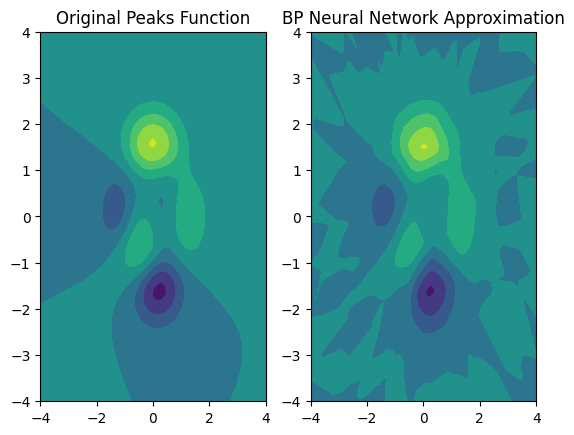

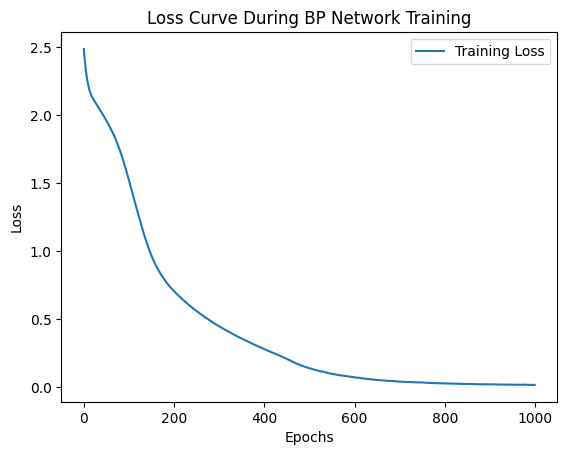

In [2]:
# 定义BP神经网络（多层感知器）
class BPNet(nn.Module):
    def __init__(self):
        super(BPNet, self).__init__()
        # 输入层 2 -> 隐藏层 64 -> 隐藏层 32 -> 输出层 1
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 初始化模型
model = BPNet()

# 损失函数和优化器
criterion = nn.MSELoss()  # 使用均方误差
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam优化器

# 训练模型
epochs = 1000  # 训练轮数
loss_history=[]
for epoch in range(epochs):
    optimizer.zero_grad()  # 梯度清零
    outputs = model(train_data)  # 前向传播
    loss = criterion(outputs, train_labels)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 参数更新

    loss_history.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 网格上生成测试数据
x_test, y_test = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
test_data = torch.tensor(np.vstack([x_test.ravel(), y_test.ravel()]).T, dtype=torch.float32)

# 使用训练好的模型预测z值
with torch.no_grad():
    z_pred = model(test_data).numpy().reshape(100, 100)

# 绘制原始peaks函数和逼近结果的对比图
z_true = peaks(x_test, y_test)

# 原始peaks函数
plt.subplot(1, 2, 1)
plt.contourf(x_test, y_test, z_true, cmap='viridis')
plt.title('Original Peaks Function')

# BP神经网络逼近的函数
plt.subplot(1, 2, 2)
plt.contourf(x_test, y_test, z_pred, cmap='viridis')
plt.title('BP Neural Network Approximation')
plt.show()

plt.figure()
plt.plot(range(epochs), loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve During BP Network Training')
plt.legend()
plt.show()



#### 样本个数的影响

Samples: 100, Epoch [100/1000], Test Loss: 1.3495
Samples: 100, Epoch [200/1000], Test Loss: 1.0227
Samples: 100, Epoch [300/1000], Test Loss: 0.8384
Samples: 100, Epoch [400/1000], Test Loss: 0.7351
Samples: 100, Epoch [500/1000], Test Loss: 0.6686
Samples: 100, Epoch [600/1000], Test Loss: 0.6042
Samples: 100, Epoch [700/1000], Test Loss: 0.5505
Samples: 100, Epoch [800/1000], Test Loss: 0.4935
Samples: 100, Epoch [900/1000], Test Loss: 0.4332
Samples: 100, Epoch [1000/1000], Test Loss: 0.3827
Samples: 500, Epoch [100/1000], Test Loss: 1.6264
Samples: 500, Epoch [200/1000], Test Loss: 1.2311
Samples: 500, Epoch [300/1000], Test Loss: 1.0110
Samples: 500, Epoch [400/1000], Test Loss: 0.8837
Samples: 500, Epoch [500/1000], Test Loss: 0.7804
Samples: 500, Epoch [600/1000], Test Loss: 0.6860
Samples: 500, Epoch [700/1000], Test Loss: 0.5992
Samples: 500, Epoch [800/1000], Test Loss: 0.5231
Samples: 500, Epoch [900/1000], Test Loss: 0.4606
Samples: 500, Epoch [1000/1000], Test Loss: 0.408

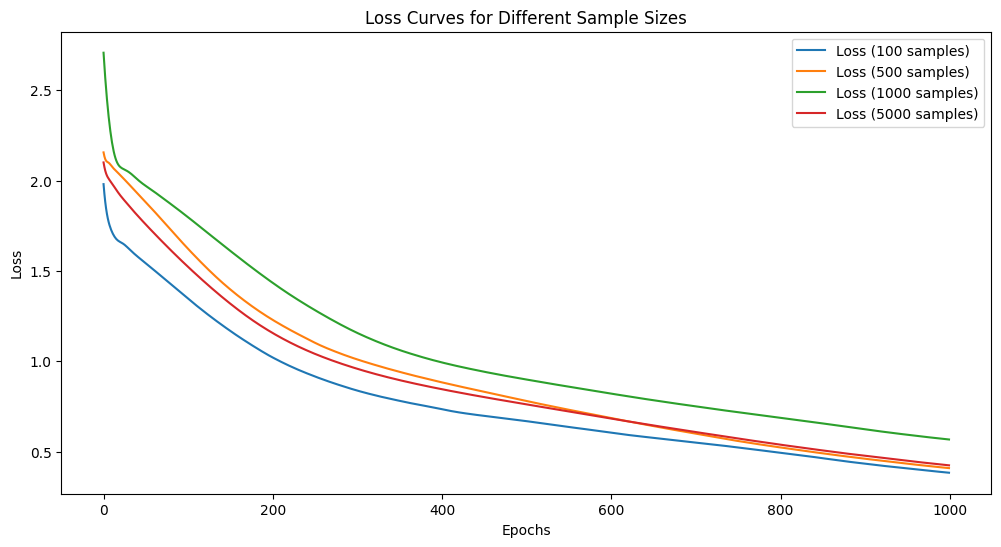

In [17]:
sample_sizes = [100, 500, 1000, 5000]
losses = []

for size in sample_sizes:
    # 生成训练样本
    x_samples = np.random.uniform(-4, 4, size)
    y_samples = np.random.uniform(-4, 4, size)
    z_samples = peaks(x_samples, y_samples)

    train_data = torch.tensor(np.vstack((x_samples, y_samples)).T, dtype=torch.float32)
    train_labels = torch.tensor(z_samples, dtype=torch.float32).view(-1, 1)

    # 定义BP网络
    class BPNetwork(nn.Module):
        def __init__(self):
            super(BPNetwork, self).__init__()
            self.fc1 = nn.Linear(2, 100)
            self.fc2 = nn.Linear(100, 1)

        def forward(self, x):
            x = torch.relu(self.fc1(x))
            return self.fc2(x)

    model = BPNetwork()
    criterion = nn.MSELoss()  # 定义损失函数
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 训练模型
    epochs = 1000
    loss_history = []

    # 测试数据
    x_test, y_test = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
    test_data = torch.tensor(np.vstack([x_test.ravel(), y_test.ravel()]).T, dtype=torch.float32)
    z_true = peaks(x_test, y_test).reshape(-1, 1)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(train_data)
        loss = criterion(outputs, train_labels)  # 计算训练损失
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Samples: {size}, Epoch [{epoch + 1}/{epochs}], Test Loss: {loss.item():.4f}')

    losses.append(loss_history)

# 绘制损失曲线
plt.figure(figsize=(12, 6))
for i, size in enumerate(sample_sizes):
    plt.plot(losses[i], label=f'Loss ({size} samples)')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves for Different Sample Sizes')
plt.legend()
plt.show()


#### 样本分布的影响

Distribution: uniform, Epoch [100/1000], Loss: 1.0480
Distribution: uniform, Epoch [200/1000], Loss: 0.5385
Distribution: uniform, Epoch [300/1000], Loss: 0.3385
Distribution: uniform, Epoch [400/1000], Loss: 0.1978
Distribution: uniform, Epoch [500/1000], Loss: 0.0981
Distribution: uniform, Epoch [600/1000], Loss: 0.0511
Distribution: uniform, Epoch [700/1000], Loss: 0.0300
Distribution: uniform, Epoch [800/1000], Loss: 0.0199
Distribution: uniform, Epoch [900/1000], Loss: 0.0132
Distribution: uniform, Epoch [1000/1000], Loss: 0.0097
Distribution: non-uniform, Epoch [100/1000], Loss: 2.8629
Distribution: non-uniform, Epoch [200/1000], Loss: 1.0504
Distribution: non-uniform, Epoch [300/1000], Loss: 0.3908
Distribution: non-uniform, Epoch [400/1000], Loss: 0.1827
Distribution: non-uniform, Epoch [500/1000], Loss: 0.0959
Distribution: non-uniform, Epoch [600/1000], Loss: 0.0546
Distribution: non-uniform, Epoch [700/1000], Loss: 0.0347
Distribution: non-uniform, Epoch [800/1000], Loss: 0.

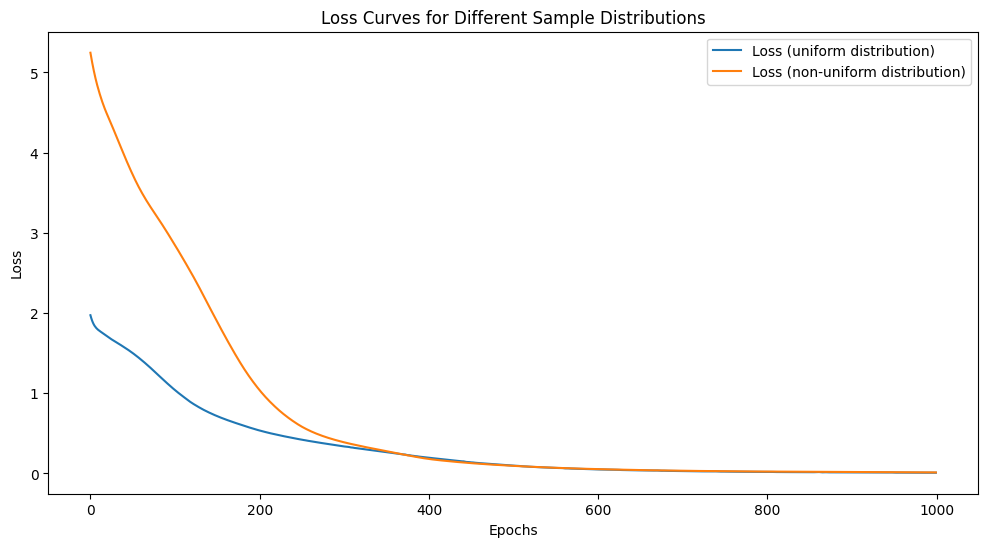

In [12]:
# 通过改变样本分布进行实验
distributions = ['uniform', 'non-uniform']
loss_histories = []

for distribution in distributions:
    # 生成训练样本
    if distribution == 'uniform':
        x_samples = np.random.uniform(-4, 4, 1000)
        y_samples = np.random.uniform(-4, 4, 1000)
    else:
        # 非均匀分布，集中在 peaks 函数的峰值附近
        x_samples = np.random.normal(0, 1, 1000)
        y_samples = np.random.normal(-1, 1, 1000)

        # 限制在 [-4, 4] 区域内
        x_samples = np.clip(x_samples, -4, 4)
        y_samples = np.clip(y_samples, -4, 4)

    z_samples = peaks(x_samples, y_samples)
    train_data = torch.tensor(np.vstack((x_samples, y_samples)).T, dtype=torch.float32)
    train_labels = torch.tensor(z_samples, dtype=torch.float32).view(-1, 1)

    # 定义BP网络
    model = BPNet()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_history = []

    # 训练模型
    for epoch in range(1000):
        optimizer.zero_grad()
        outputs = model(train_data)
        loss = criterion(outputs, train_labels)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Distribution: {distribution}, Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}')

    loss_histories.append(loss_history)

# 绘制损失曲线
plt.figure(figsize=(12, 6))
for i, distribution in enumerate(distributions):
    plt.plot(loss_histories[i], label=f'Loss ({distribution} distribution)')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves for Different Sample Distributions')
plt.legend()
plt.show()

### Based-on RBF

Epoch [100/1000], Loss: 1.5074
Epoch [200/1000], Loss: 1.1690
Epoch [300/1000], Loss: 0.9508
Epoch [400/1000], Loss: 0.8131
Epoch [500/1000], Loss: 0.7210
Epoch [600/1000], Loss: 0.6520
Epoch [700/1000], Loss: 0.5962
Epoch [800/1000], Loss: 0.5494
Epoch [900/1000], Loss: 0.5092
Epoch [1000/1000], Loss: 0.4739


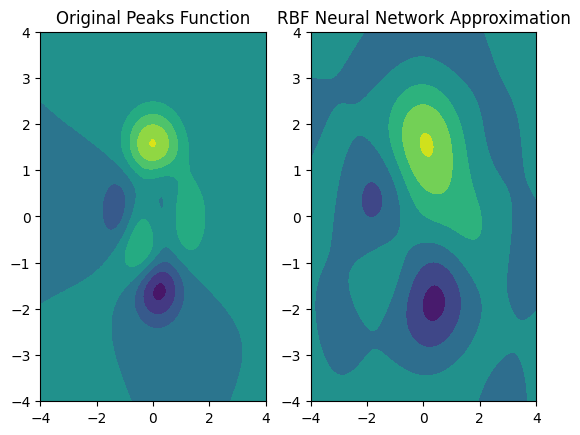

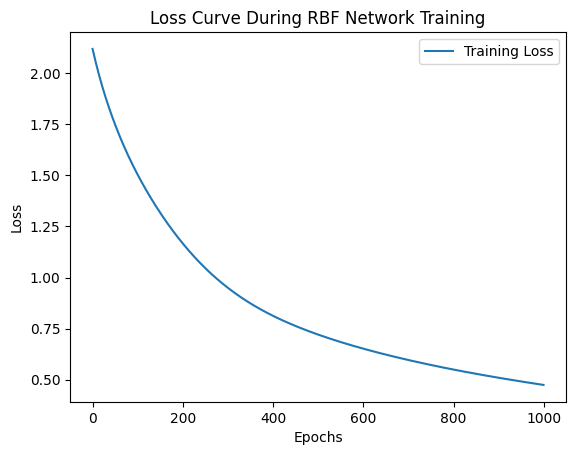

In [21]:
# Define RBF layer
class RBFLayer(nn.Module):
    def __init__(self, in_features, out_features, centers=None, gamma=1.0):
        super(RBFLayer, self).__init__()
        if centers is None:
            self.centers = nn.Parameter(torch.randn(out_features, in_features))  # 随机初始化中心
        else:
            self.centers = nn.Parameter(centers)  # 使用给定的中心
        self.gamma = gamma

    def forward(self, x):
        # Compute radial basis function distance
        x = x.unsqueeze(1) - self.centers
        return torch.exp(-self.gamma * (x ** 2).sum(2))

# Define RBF network
class RBFNet(nn.Module):
    def __init__(self, in_features, hidden_features, out_features, centers, gamma=1.0):
        super(RBFNet, self).__init__()
        self.rbf = RBFLayer(in_features, hidden_features, centers, gamma)
        self.fc = nn.Linear(hidden_features, out_features)

    def forward(self, x):
        rbf_out = self.rbf(x)
        return self.fc(rbf_out)

# Initialize RBF network
centers = train_data[:100].clone()

model = RBFNet(in_features=2, hidden_features=100, out_features=1,centers=centers, gamma=0.5)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 1000
loss_history = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(train_data)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Generate test data on a grid
x_test, y_test = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
test_data = torch.tensor(np.vstack([x_test.ravel(), y_test.ravel()]).T, dtype=torch.float32)

# Predict z values using the trained model
with torch.no_grad():
    z_pred = model(test_data).numpy().reshape(100, 100)

# Visualize the original peaks function and the approximation
z_true = peaks(x_test, y_test)

# Original peaks function
plt.subplot(1, 2, 1)
plt.contourf(x_test, y_test, z_true, cmap='viridis')
plt.title('Original Peaks Function')

# RBF neural network approximation
plt.subplot(1, 2, 2)
plt.contourf(x_test, y_test, z_pred, cmap='viridis')
plt.title('RBF Neural Network Approximation')

plt.show()

# Plot the loss curve during training
plt.figure()
plt.plot(range(epochs), loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve During RBF Network Training')
plt.legend()
plt.show()


#### `gamma` 对函数逼近的影响

Gamma: 0.01, Epoch [100/1000], Test Loss: 1.9179
Gamma: 0.01, Epoch [200/1000], Test Loss: 1.9140
Gamma: 0.01, Epoch [300/1000], Test Loss: 1.9101
Gamma: 0.01, Epoch [400/1000], Test Loss: 1.9060
Gamma: 0.01, Epoch [500/1000], Test Loss: 1.9018
Gamma: 0.01, Epoch [600/1000], Test Loss: 1.8974
Gamma: 0.01, Epoch [700/1000], Test Loss: 1.8930
Gamma: 0.01, Epoch [800/1000], Test Loss: 1.8885
Gamma: 0.01, Epoch [900/1000], Test Loss: 1.8840
Gamma: 0.01, Epoch [1000/1000], Test Loss: 1.8795
Gamma: 0.1, Epoch [100/1000], Test Loss: 1.5883
Gamma: 0.1, Epoch [200/1000], Test Loss: 1.4653
Gamma: 0.1, Epoch [300/1000], Test Loss: 1.3908
Gamma: 0.1, Epoch [400/1000], Test Loss: 1.3426
Gamma: 0.1, Epoch [500/1000], Test Loss: 1.3081
Gamma: 0.1, Epoch [600/1000], Test Loss: 1.2823
Gamma: 0.1, Epoch [700/1000], Test Loss: 1.2620
Gamma: 0.1, Epoch [800/1000], Test Loss: 1.2453
Gamma: 0.1, Epoch [900/1000], Test Loss: 1.2308
Gamma: 0.1, Epoch [1000/1000], Test Loss: 1.2179
Gamma: 1, Epoch [100/1000], 

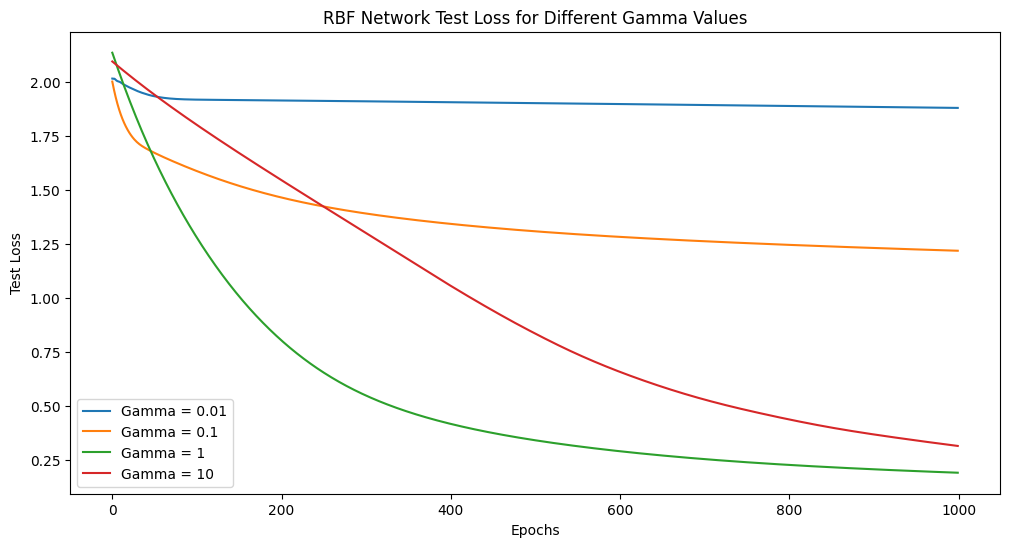

In [25]:
gamma_values = [0.01, 0.1, 1, 10]
losses = []

# 选择部分样本作为 RBF 中心
centers = train_data[:100].clone()

for gamma in gamma_values:
    # 定义 RBF 网络，使用不同的 gamma 参数
    model = RBFNet(in_features=2, hidden_features=100, out_features=1, centers=centers, gamma=gamma)

    # 定义损失函数和优化器
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 训练模型
    epochs = 1000
    loss_history = []

    # 测试数据
    x_test, y_test = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
    test_data = torch.tensor(np.vstack([x_test.ravel(), y_test.ravel()]).T, dtype=torch.float32)
    z_true = peaks(x_test, y_test).reshape(-1, 1)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(train_data)
        loss = criterion(outputs, train_labels)
        loss.backward()
        optimizer.step()

        # 计算测试损失
        with torch.no_grad():
            test_outputs = model(test_data)
            test_loss = criterion(test_outputs, torch.tensor(z_true, dtype=torch.float32))

        loss_history.append(test_loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Gamma: {gamma}, Epoch [{epoch + 1}/{epochs}], Test Loss: {test_loss.item():.4f}')

    losses.append(loss_history)

# 绘制不同 gamma 下的损失曲线
plt.figure(figsize=(12, 6))
for i, gamma in enumerate(gamma_values):
    plt.plot(losses[i], label=f'Gamma = {gamma}')

plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('RBF Network Test Loss for Different Gamma Values')
plt.legend()
plt.show()

* `gamma`太小：响应区域很小，导致网络无法逼近目标函数，可能存在过拟合
* `gamma`太大：响应范围打，响应过于平滑，函数的特征可能无法捕捉，逼近能力下降，可能存在欠拟合

### 隐层激活函数对BP响应的影响

Epoch [100/1000], Tanh Loss: 1.7057, ReLU Loss: 1.8136
Epoch [200/1000], Tanh Loss: 1.5113, ReLU Loss: 1.5105
Epoch [300/1000], Tanh Loss: 1.2897, ReLU Loss: 1.2380
Epoch [400/1000], Tanh Loss: 1.0694, ReLU Loss: 1.0683
Epoch [500/1000], Tanh Loss: 0.8961, ReLU Loss: 0.9785
Epoch [600/1000], Tanh Loss: 0.7697, ReLU Loss: 0.9227
Epoch [700/1000], Tanh Loss: 0.6806, ReLU Loss: 0.8813
Epoch [800/1000], Tanh Loss: 0.6173, ReLU Loss: 0.8497
Epoch [900/1000], Tanh Loss: 0.5670, ReLU Loss: 0.8199
Epoch [1000/1000], Tanh Loss: 0.5220, ReLU Loss: 0.7917


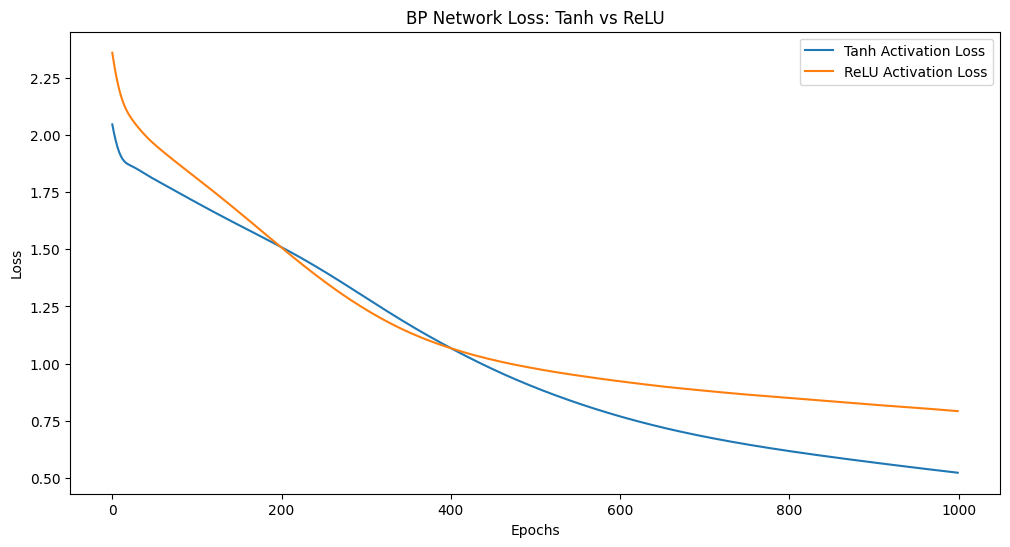

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 定义 BP 网络
class BPNet_Tanh(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(BPNet_Tanh, self).__init__()
        self.hidden = nn.Linear(in_features, hidden_features)
        self.activation = nn.Tanh()  # 使用 Tanh 激活函数
        self.output = nn.Linear(hidden_features, out_features)

    def forward(self, x):
        hidden_out = self.activation(self.hidden(x))
        return self.output(hidden_out)

class BPNet_ReLU(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(BPNet_ReLU, self).__init__()
        self.hidden = nn.Linear(in_features, hidden_features)
        self.activation = nn.ReLU()  # 使用 ReLU 激活函数
        self.output = nn.Linear(hidden_features, out_features)

    def forward(self, x):
        hidden_out = self.activation(self.hidden(x))
        return self.output(hidden_out)

# 定义 peaks 函数
def peaks(x, y):
    return 3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2) - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2) - 1/3 * np.exp(-(x + 1)**2 - y**2)

# 生成训练样本
x_samples = np.random.uniform(-4, 4, 1000)
y_samples = np.random.uniform(-4, 4, 1000)
z_samples = peaks(x_samples, y_samples)

train_data = torch.tensor(np.vstack((x_samples, y_samples)).T, dtype=torch.float32)
train_labels = torch.tensor(z_samples, dtype=torch.float32).view(-1, 1)

# 定义模型
model_tanh = BPNet_Tanh(in_features=2, hidden_features=50, out_features=1)
model_relu = BPNet_ReLU(in_features=2, hidden_features=50, out_features=1)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer_tanh = optim.Adam(model_tanh.parameters(), lr=0.001)
optimizer_relu = optim.Adam(model_relu.parameters(), lr=0.001)

# 训练模型
epochs = 1000
loss_history_tanh = []
loss_history_relu = []

x_test, y_test = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
test_data = torch.tensor(np.vstack([x_test.ravel(), y_test.ravel()]).T, dtype=torch.float32)
z_true = peaks(x_test, y_test).reshape(-1, 1)

for epoch in range(epochs):
    # 训练 Tanh 模型
    optimizer_tanh.zero_grad()
    outputs_tanh = model_tanh(train_data)
    loss_tanh = criterion(outputs_tanh, train_labels)
    loss_tanh.backward()
    optimizer_tanh.step()

    # 训练 ReLU 模型
    optimizer_relu.zero_grad()
    outputs_relu = model_relu(train_data)
    loss_relu = criterion(outputs_relu, train_labels)
    loss_relu.backward()
    optimizer_relu.step()

    # 记录损失
    loss_history_tanh.append(loss_tanh.item())
    loss_history_relu.append(loss_relu.item())

    # 输出每 100 次迭代的损失
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], '
              f'Tanh Loss: {loss_tanh.item():.4f}, '
              f'ReLU Loss: {loss_relu.item():.4f}')

# 绘制 Tanh 和 ReLU 的损失曲线对比
plt.figure(figsize=(12, 6))
plt.plot(loss_history_tanh, label='Tanh Activation Loss')
plt.plot(loss_history_relu, label='ReLU Activation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('BP Network Loss: Tanh vs ReLU')
plt.legend()
plt.show()


`Tanh`
* 优点：非线性关系捕捉效果好，适合逼近精细特征；对称性保证更好的归一化
* 缺点：可能产生梯度消失问题，收敛速度相对较慢

`ReLU`
* 优点：训练速度快，没有梯度消失问题，简单高效。
* 缺点：可能导致“死神经元”问题，即某些神经元训练过程中变得不可被激活。